<a href="https://colab.research.google.com/github/alsh02/Mathematical-Explorations/blob/main/%EC%95%84%EC%9D%B4%EC%8A%A4%ED%81%AC%EB%A6%BC_%EA%B5%AC%EB%A7%A4%EC%97%90_%EB%8C%80%ED%95%9C_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 아이스크림 구매에 대한 선형회귀분석
평균 기온에 따른 아이스크림 쇼핑 클릭량 평균 데이터를 계급으로 나누고, 그 데이터들을 상관분석 해봅시다. 그런 다음 데이터가 선형성을 가진다는 걸 눈으로 직접 확인하고 데이터들을 선형회귀분석하여 미래를 예측해봅시다.

## 1. 데이터 계급화
temp_ice.csv 파일을 불러온 다음 평균 기온의 도수분포표를 만들고, 날짜별 아이스크림 쇼핑 클릭량 합계와 평균 기온에 따른 아이스크림 쇼핑 클릭량 평균을 구해봅시다.

In [1]:
import pandas as pd

In [2]:
# 구글 드라이브 마운트하기
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### - pandas 이용해서 평균 기온과 아이스크림 쇼핑 클릭량 데이터 추출하기
pandas 라이브러리를 이용하면 책에 있는 코드의 csv 라이브러리를 이용하지 않고 간단하게 csv 파일을 다룰 수 있습니다. 반복문을 이용하지 않고 단 두 줄이면 원하는 열의 데이터를 추출할 수 있습니다.

In [3]:
data = pd.read_csv('/content/drive/MyDrive/colab_csv/temp_ice.csv', encoding='cp949')
header = data.columns
avg_temp = data[header[1]] # 평균기온 데이터
ice_click = data[header[4]] # 날짜별 아이스크림 쇼핑 클릭수 데이터

### - 평균 기온 데이터 기준으로 도수 분포 구간 설정하기

In [4]:
import numpy as np # 도수 분포 구간 설정을 위해 라이브러리 불러오기

In [5]:
# 아래 코드로 간격이 5인 7개의 계급을 만들 수 있다.
bins = np.arange(min(avg_temp), max(avg_temp) + 5, 5)
hist, bins = np.histogram(avg_temp, bins)

### - 평균 기온 데이터 기준으로 아이스크림 쇼핑 클릭수 구분하여 저장하기

In [6]:
ice_buy = np.zeros(7) # 계급별 아이스크림 쇼핑 클릭수 합계를 저장할 array 선언

for i in range(len(avg_temp)) :              # 평균 기온 데이터 전체 탐색하기
  if bins[0] <= avg_temp[i] and avg_temp[i] < bins[1] :       # 첫 번째 계급에 해당한다면 
    ice_buy[0] = ice_buy[0] + ice_click[i]                # 첫 번째 배열 값에 해당 날짜 아이스크림 쇼핑 클릭량 저장하기
        
  elif bins[1] <= avg_temp[i] and avg_temp[i] < bins[2] :     # 두 번째 계급에 해당한다면     
    ice_buy[1] = ice_buy[1] + ice_click[i]                # 두 번째 배열 값에 해당 날짜 아이스크림 쇼핑 클릭량 저장하기
        
  elif bins[2] <= avg_temp[i] and avg_temp[i] < bins[3] :     # 세 번째 계급에 해당한다면
    ice_buy[2] = ice_buy[2] + ice_click[i]                # 세 번째 배열 값에 해당 날짜 아이스크림 클릭량 저장하기

  elif bins[3] <= avg_temp[i] and avg_temp[i] < bins[4] :     # 네 번째 계급에 해당한다면
    ice_buy[3] = ice_buy[3] + ice_click[i]                # 네 번째 배열 값에 해당 날짜 아이스크림 클릭량 저장하기 
        
  elif bins[4] <= avg_temp[i] and avg_temp[i] < bins[5] :     # 다섯 번째 계급에 해당한다면
    ice_buy[4] = ice_buy[4] + ice_click[i]                # 다섯 번째 배열 값에 해당 날짜 아이스크림 클릭량 저장하기
        
  elif bins[5] <= avg_temp[i] and avg_temp[i] < bins[6] :     # 여섯 번째 계급에 해당한다면
    ice_buy[5] = ice_buy[5] + ice_click[i]                # 여섯 번째 배열 값에 해당 날짜 아이스크림 클릭수 저장하기
        
  else:                                               # 일곱 번째 계급에 해당한다면(이외의 값에 해당한다면
    ice_buy[6] = ice_buy[6] + ice_click[i]                # 일곱 번째 배열 값에 해당 날짜 아이스크림 클릭량 저장하기                


### - 평균 기온 데이터 계급별 아이스크림 쇼핑 클릭수의 평균 구하기

In [7]:
ice_buy_avg = np.zeros(7)
for i in range(len(ice_buy)):
  ice_buy_avg[i] = ice_buy[i] / hist[i] # (클릭수 합계) / (데이터 개수)

### - 평균 기온에 따른 아이스크림 쇼핑 클릭수의 평균 막대그래프로 표현하기

In [8]:
import matplotlib.pyplot as plt # 그래프를 그리기 위한 라이브러리

([<matplotlib.axis.XTick at 0x7f4f04373eb0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

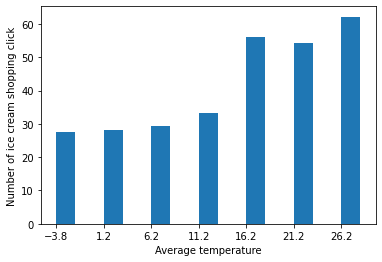

In [9]:
plt.xlabel('Average temperature')
plt.ylabel('Number of ice cream shopping click')
plt.bar(bins[0:7], ice_buy_avg, align='edge', width=2)
plt.xticks(bins[0:7])

## 2. 상관분석
데이터들의 선형성을 살펴보기 위해 상관분석을 해봅시다. 

### - 데이터 시각화
평균 기온에 따른 아이스크림 쇼핑 클릭량의 평균 데이터가 어떤 식으로 분포되어 있는지 눈으로 직접 봐봅시다.

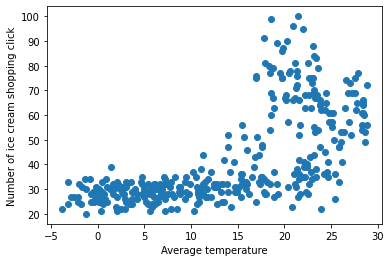

In [10]:
plt.xlabel('Average temperature')
plt.ylabel('Number of ice cream shopping click')
plt.scatter(avg_temp, ice_click)

In [11]:
# 공분산
cov = np.cov(avg_temp, ice_click)[0, 1]

# 표준편차
avg_temp_std = np.std(avg_temp)
ice_click_std = np.std(ice_click)

# 상관계수 = 공분산 / 각 변수의 표준편차의 곱
corrcoeff = cov / (avg_temp_std * ice_click_std)
corrcoeff

0.6691695022419083

0.6691695022419083 정도면 강한 양의 선형 관계라고 할 수 있습니다.
따라서 선형회귀분석을 하기 적절함을 알 수 있습니다.

## 3. 선형회귀분석
데이터가 선형성을 띄는 경우, 그 경향을 가장 잘 표현해주는 직선의 식을 찾는 과정을 선형회귀라고 합니다. 

데이터와 우리가 찾은 직선 사이의 오차가 가장 작을 때 함수식을 잘 찾았다고 이야기할 수 있을 것입니다. 이를 수식으로 표현한 것이 평균제곱근오차(Root Mean Sqaure Error, RMSE)입니다.

평균제곱근오차를 가장 작게 만드는 함수의 절편과 기울기를 찾는 방법을 최소제곱법(Least Square Method)라고 합니다.

최소제곱법을 통해 평균 기온에 따른 아이스크림 쇼핑 클릭수 평균 데이터를 대표하는 직선을 찾아봅시다.

### - 최소제곱법으로 평균제곱근오차를 최소로 만드는 기울기와 절편 찾기
아래 식은 최소제곱법으로 구한 기울기와 절편이다.

$
\beta_1 = {\displaystyle \sum^n_{i=1}(X_i - \overline X)(Y_i - \overline Y) \over \displaystyle \sum^n_{i=1}(X_i - \overline X)^2},\space
\beta_0 = \overline Y - \beta_1\overline X
$

In [16]:
avg_temp_mean = np.mean(avg_temp)
ice_click_mean = np.mean(ice_click)

n = len(avg_temp)

avg_temp_and_ice_click_sum = 0
avg_temp_sum = 0
for i in range(n):
  avg_temp_and_ice_click_sum += (avg_temp[i] - avg_temp_mean) * (ice_click[i] - ice_click_mean)
  avg_temp_sum += (avg_temp[i] - avg_temp_mean) ** 2

# 기울기와 절편 선언
# 편미분을 통해 평균제곱근오차를 최소로 만드는 기울기와 절편을 구할 수 있다.
beta1 = avg_temp_and_ice_click_sum / avg_temp_sum
beta0 = ice_click_mean - (beta1 * avg_temp_mean)

### - 학습된 선형회귀모델을 기반으로 기온이 주어지면 아이스크림 쇼핑 클릭수 예측하기

In [15]:
def regression(beta0, beta1, x):
  return beta0 + beta1 * x

In [18]:
input_temp = float(input("오늘의 기온은 : "))

predicted_ice_click = regression(beta0, beta1, input_temp)
print(f"오늘의 아이스크림 쇼핑 클릭수는 100점을 기준으로 {predicted_ice_click} 만큼 예상됩니다.")

오늘의 기온은 : 30
오늘의 아이스크림 쇼핑 클릭량은 100점을 기준으로 63.931663973079566 만큼 예상됩니다.
